#### Import neccesary libraries

In [1]:
import csv

#### Define required functions and classes

In [2]:
# Reads and Sanitizes inputs taken from the User

def sanitize_input(val):
    if(val.strip() == ""):
        return None
    if(val.lower() == "x"):
        return "x"
    elif(val.lower()=="y" or val.lower()=="yes"):
        return True
    elif(val.lower()=="n" or val.lower()=="no"):
        return False
    elif(val.lower()=="m" or val.lower()=="f"):
        return val.lower()
    else:
        return val

In [3]:
# Class to store all data per person

class TreeNode:
    '''
    Class for holding data of each node. Contains all information related to the person in the node.
    '''        
        
    def __init__(self,name,Tree,sex = None,mother = None,father = None,children_ref = [],married = None):
        '''
        Create variables for the node
        '''
        self.name = name
        self.sex = sex
        self.mother = mother
        self.father = father
        self.children_ref = children_ref.copy()  
        self.tree = Tree
        self.pos = len(Tree)
        self.married = married
        
    def display(self):
        '''
        Display all the variables of the node
        '''
        
        print("\n")
        print("self.name is :{}".format(self.name))
        print("self.pos value is: {}".format(self.pos))
        print("self.sex value is: {}".format(self.sex))
        
        print("self.mother value is: {}".format(self.mother))
        print("self.father value is: {}".format(self.father))
        
        print("self.married value is: {}".format(self.married))
        print("self.children_ref value is: {}".format(self.children_ref)) 
        
        print("Number of members in tree is : {}".format(len(self.tree)))
        
        print("\n")

    def update(self , is_married = False):
        '''
        Check and update all missing variable values of the node
        '''
#         print("-------------------------------\n")
#         [i.display() for i in self.tree]
        
        #Check and add sex
#         print("Update sex of {}".format(self.name))
        if(self.sex == None):
            self.sex = sanitize_input(input("Enter {}'s gender (m/f): ".format(self.name)))
         
        #Ask if the person is married if not known
#         print("Check if married {}".format(self.name))
        if(self.married == None and (not is_married)):
            is_married = sanitize_input(input("Is {} married? (y/n): ".format(self.name)))
            
        #If married, ask for spouse name
#         print("Ask spouse name {}".format(self.name))
        if(is_married):
            self.married = sanitize_input(input("{}'s spouses name (x if not sure / blank if not needed): ".format(self.name)))
        
        #Is name spouse name isn't blank add spouse
        
        if(self.married!= None and is_married):
#             print("Adding spouse node for {}".format(self.name))
            self.tree.append(TreeNode(self.married,self.tree,married = self.pos,children_ref = self.children_ref))
            self.married = len(self.tree) - 1
            
            if(self.sex == "m"):
                self.tree[-1].sex = "f"
                for i in self.children_ref:
                    self.tree[i].mother = self.married
            else:
                self.tree[-1].sex = "m"
                for i in self.children_ref:
                    self.tree[i].father = self.married
        
        #Check and add Children -> Also adds new node
        if(is_married):            
#             print("Check for children for {}".format(self.name))
            while(sanitize_input(input("Does {} have a {}th child? (y/n): ".format(self.name,len(self.children_ref)+1)))):
                print("Known children: {}".format([self.tree[i].name for i in self.children_ref]))
                child = sanitize_input(input("Enter {}'s {}'th child's name (x if not sure / blank if not needed): ".format(self.name,len(self.children_ref)+1)))
                
#                 print("Adding Child node for {}".format(self.name))
                self.tree.append(TreeNode(child,self.tree))
#                 print("Appending childref node for {}".format(self.name))
                self.children_ref.append(len(self.tree) - 1)
                
                if(self.married!=None):
                    self.tree[self.married].children_ref.append(len(self.tree) - 1)
#                 print("Updating childrens parent sex for {}".format(self.name))
                if(self.sex == "m"):
                    self.tree[-1].father = self.pos
                    self.tree[-1].mother = self.married
                else:
                    self.tree[-1].mother = self.pos
                    self.tree[-1].father = self.married

                self.tree[-1].update()
        
        #Update family relations of spouse
#         print("Updating spouse node details for {}".format(self.name))
        if(self.married!= None and is_married):
            self.tree[self.married].update()
            
        #Check and add mother -> Also adds new node
        flag = 0
        if(self.mother == None):    
            self.mother = sanitize_input(input("Enter {}'s mother's name (x if not sure / blank if not needed): ".format(self.name)))
            flag = 1
#         print("Adding mopther node for {}".format(self.name))
        if(flag and (self.mother != None)):
            self.tree.append(TreeNode(self.mother,self.tree))
            self.tree[-1].sex = "f"
            self.tree[-1].children_ref.append(self.pos)
            self.mother = len(self.tree) - 1
            self.tree[-1].update(is_married = True)
            
        #Check and add father -> Also adds new node 
        flag = 0
        if(self.father == None):
            self.father = sanitize_input(input("Enter {}'s father's name (x if not sure / blank if not needed): ".format(self.name)))
            flag = 1
            
#         print("Adding Father node for {}".format(self.name))
        if(flag and (self.father != None)):
            self.tree.append(TreeNode(self.father,self.tree))
            self.father = len(self.tree) - 1
            self.tree[-1].children_ref.append(self.pos)
            self.tree[-1].sex = "m"
            self.tree[-1].married = self.mother
            self.tree[-1].update(is_married = True)


In [4]:
def NewTree(name):
    '''
    Creates and Initialises a new family tree 
    '''
    #List to hold all the members
    family = []
    
    #Adds first member
    family.append(TreeNode(name,family))
    
    #Iteratively adds new members
    family[0].update()
    
    return family

def SaveTree(Tree,file_name):
    '''
    Saves the tree as an csv file for record
    '''
    to_write = [["Sl_No","Name","Sex","Mother","Father","Children","Spouse"]]
    for node in Tree:
        to_write+=[[
            str(node.pos),
            str(node.name),
            str(node.sex),
            str(node.mother),
            str(node.father),
            str(node.children_ref),
            str(node.married)
        ]]
    
    with open(file_name, "w", newline='') as csvout:
        csvout = csv.writer(csvout)
        csvout.writerows(to_write)
            
def ReadTree(file_name):
    '''
    Reads the tree from csv file
    '''
    File = []
    with open(file_name, "r", newline='') as csvin:
        csvin = csv.reader(csvin)
        next(csvin)
        for row in csvin:
            File+=[[
                int(row[0]) if row[0] != "None" else None,     #Reads pos
                row[1] if row[1] != "None" else None,          #Reads name
                row[2] if row[2] != "None" else None,          #Reads sex
                int(row[3]) if row[3] != "None" else None,     #Reads mother position
                int(row[4]) if row[4] != "None" else None,     #Reads father position
                eval(row[5]) if row[5] != "None" else None,    #Reads children position
                int(row[6]) if row[6] != "None" else None      #Reads spouse position
            ]]
            
    Tree = []
    for i in File:
        Tree.append(TreeNode(name = i[1],
                              Tree = Tree,
                              sex=i[2],
                              mother = i[3],
                              father = i[4],
                              children_ref = i[5],
                              married = i[6]
                             ))
    return Tree

#### Execute Code

In [5]:
My_family = NewTree("Adithya Jayan")

Enter Adithya Jayan's gender (m/f): m
Is Adithya Jayan married? (y/n): n
Enter Adithya Jayan's mother's name (x if not sure / blank if not needed): Mini
Mini's spouses name (x if not sure / blank if not needed): Jayan
Does Mini have a 2th child? (y/n): y
Known children: ['Adithya Jayan']
Enter Mini's 2'th child's name (x if not sure / blank if not needed): Anirudh
Enter Anirudh's gender (m/f): m
Is Anirudh married? (y/n): n
Does Mini have a 3th child? (y/n): n
Enter Jayan's mother's name (x if not sure / blank if not needed): 
Enter Jayan's father's name (x if not sure / blank if not needed): 
Enter Mini's mother's name (x if not sure / blank if not needed): 
Enter Mini's father's name (x if not sure / blank if not needed): 


In [6]:
#Saves tree into file
filename = "Myfamily.csv"
SaveTree(My_family,filename)

In [7]:
# for node in My_family:
#     node.display()

In [8]:
#Reads tree from file
filename = "Myfamily.csv"
Tree = ReadTree(filename)

In [9]:
# for node in Tree:
#     node.display()

#### Temporary Plotting script

In [10]:
!pip install networkx 

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import matplotlib.pyplot as plt
import pydot

You should consider upgrading via the 'c:\users\adith\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
def Graph(Tree):
    print("******************  CONSTRUCTING GRAPH **********************")
    plt.figure(figsize=(16,16)) #Create new figure

    G = nx.DiGraph() #Create graph object
    plt.margins(x=0.2) # Add margin to prevent clipping

    for position,node in enumerate(Tree):#Loop through all nodes
        G.add_node("{}\n({})".format(node.name,node.pos))   #Add node to the graph    

        #If not a leaf node, the add edges between node and children in graph
        if(node.mother != None): 
            G.add_edge("{}\n({})".format(Tree[node.mother].name,Tree[node.mother].pos),"{}\n({})".format(node.name,node.pos), Input=("Child"),color='b')
        if(node.father != None):
            G.add_edge( "{}\n({})".format(Tree[node.father].name,Tree[node.father].pos), "{}\n({})".format(node.name,node.pos), Input=("Child"),color='b')
        if(node.married != None and node.sex == 'f'):
            G.add_edge("{}\n({})".format(node.name,node.pos),"{}\n({})".format(Tree[node.married].name,Tree[node.married].pos), Input=("Husband"),color='g')

    # Generate poitions for nodes in the graph
    pos = graphviz_layout(G, prog="dot")

    #Create edge labels and colours
    edge_labels = dict([((n1, n2), d['Input']) for n1, n2, d in G.edges(data=True)]) 
    colors = [G[u][v]['color'] for u,v in G.edges()]

    #Draw the graph and labels
    nx.draw(G, with_labels=True,pos=pos,style = "solid",connectionstyle="arc3,rad=0.01",node_size = 3000,node_color="none",edge_color=colors,width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.7,font_color='black', font_size=8, font_weight='bold')

    #Display image
    plt.show()

******************  CONSTRUCTING GRAPH **********************


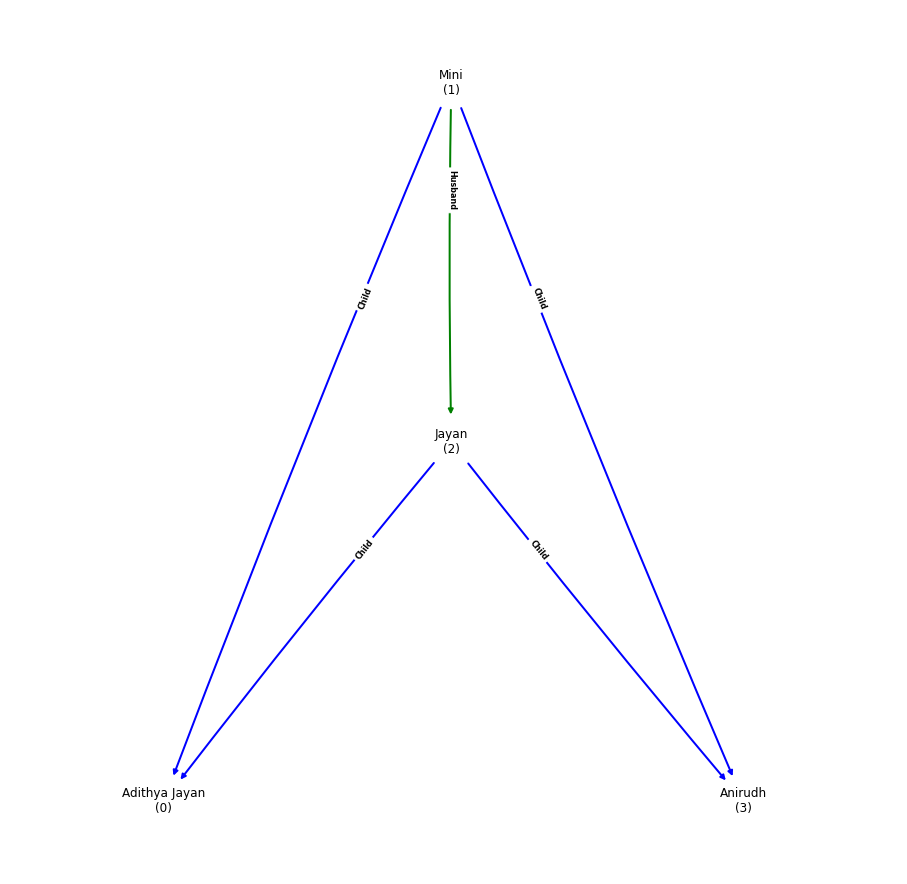

In [12]:
Graph(Tree)